In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [7]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
data = data.drop(columns=['Unnamed: 0', 'key'])

In [14]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1ea44c0dae0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea44c0e020>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea44c0d840>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea44c0e560>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea44c0e800>],
 'means': []}

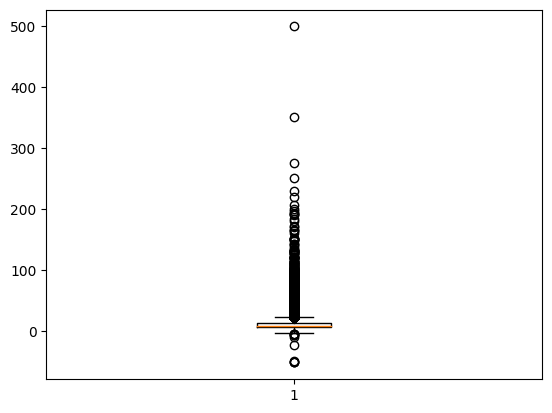

In [15]:
plt.boxplot(data['fare_amount'])

In [16]:
qlow = data['fare_amount'].quantile(0.01)
qup = data['fare_amount'].quantile(0.99)
data = data[(data['fare_amount'] >= qlow) & (data['fare_amount'] <= qup)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea44b535e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea44b86ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea44b532e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea44b53d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea44320040>],
 'means': []}

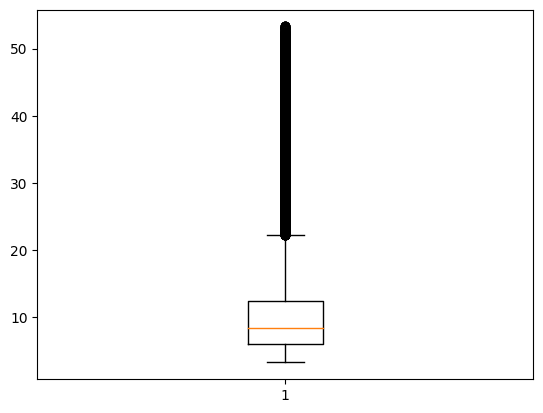

In [17]:
plt.boxplot(data['fare_amount'])

In [19]:
corr = data.select_dtypes(include=['float64', 'int64']).corr()
print(corr)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.006210        -0.004605   
pickup_longitude      0.006210          1.000000        -0.811972   
pickup_latitude      -0.004605         -0.811972         1.000000   
dropoff_longitude     0.005701          0.833611        -0.774057   
dropoff_latitude     -0.007339         -0.847468         0.698700   
passenger_count       0.012666         -0.000582        -0.001405   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                 0.005701         -0.007339         0.012666  
pickup_longitude            0.833611         -0.847468        -0.000582  
pickup_latitude            -0.774057          0.698700        -0.001405  
dropoff_longitude           1.000000         -0.915022         0.000180  
dropoff_latitude           -0.915022          1.000000        -0.000750  
passenger_count             0.000180         -0.000750         1.000000 

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x = data.drop(columns=['fare_amount'])
y = data['fare_amount']

In [24]:
x['pickup_datetime'] = x['pickup_datetime'].astype(np.int64) // 10**9

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [29]:
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
lr_pred = lr.predict(x_test)
rfr_pred = rfr.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_r2 = r2_score(y_test, rfr_pred)

In [35]:
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")
print(f"Random Forest Regressor - MSE: {rfr_mse}, R2: {rfr_r2}")

Linear Regression - MSE: 64.32069476959505, R2: 0.01079592964227083
Random Forest Regressor - MSE: 11.264298765405064, R2: 0.8267635287774988
